In [1]:
import pandas as pd
import seaborn as sbn
import geopandas as geo_pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! ls /data

'California Census Block Centroids.txt'   incident_distances.zip
 city_facilities.csv			  incident_nearest_distances.zip
 CSE6242				  List_of_Streets_and_Intersections.csv
 CSE6242.zip				  Rush_Hour_Routes.csv
 fire_incidents.csv			 'SF Find Neighborhoods.geojson'
 fire_incidents.zip			  Speed_Limits_per_Street_Segment.csv
 fire_prev_districts.zip		  stclines_highways.csv
 group_1_data.csv			  Streets___Active_and_Retired.csv


## Load Fire Incidents

In [3]:
all_incidents = geo_pd.read_file("/data/fire_incidents.csv")
all_incidents['point'] = geo_pd.GeoSeries.from_wkt(all_incidents['point'], crs="EPSG:4326")

# geopandas has a bug, or I'm doing something wrong, where the geometry doesn't get set using .set_geometry,
# instead, just recreate the object and set the geometry at initialization
all_incidents = geo_pd.GeoDataFrame(all_incidents, geometry="point")
all_incidents.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 566251 entries, 0 to 566250
Data columns (total 65 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   Incident Number                               566251 non-null  object  
 1   Exposure Number                               566251 non-null  object  
 2   ID                                            566251 non-null  object  
 3   Address                                       566251 non-null  object  
 4   Incident Date                                 566251 non-null  object  
 5   Call Number                                   566251 non-null  object  
 6   Alarm DtTm                                    566251 non-null  object  
 7   Arrival DtTm                                  566251 non-null  object  
 8   Close DtTm                                    566251 non-null  object  
 9   City                         

In [4]:
all_incidents.ID.astype('int64', copy=False)

0          80283040
1          80283030
2          80283090
3          80283140
4          80283190
            ...    
566246    210683470
566247    210741500
566248    210741780
566249    210773690
566250    210773670
Name: ID, Length: 566251, dtype: int64

In [5]:
all_incidents.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Load Neighborhoods

In [6]:
sf_neighborhoods = geo_pd.read_file('/data/SF Find Neighborhoods.geojson')
sf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   link      93 non-null     object  
 1   name      117 non-null    object  
 2   geometry  117 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 2.9+ KB


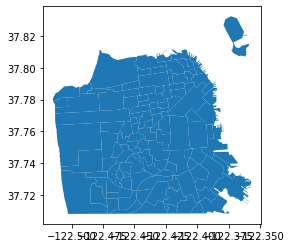

In [7]:
_ = sf_neighborhoods.geometry.plot()

## Load facilities

In [8]:
facilities_list = pd.read_csv("/data/city_facilities.csv")
facilities_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   facility_id               80 non-null     int64  
 1   common_name               80 non-null     object 
 2   address                   80 non-null     object 
 3   city                      80 non-null     object 
 4   zip_code                  80 non-null     int64  
 5   block_lot                 79 non-null     object 
 6   owned_leased              80 non-null     object 
 7   dept_id_for_jurisdiction  80 non-null     int64  
 8   jurisdiction              80 non-null     object 
 9   gross_sq_ft               64 non-null     float64
 10  longitude                 80 non-null     float64
 11  latitude                  80 non-null     float64
 12  supervisor_district       80 non-null     int64  
 13  city_tenants              0 non-null      float64
 14  land_id     

In [9]:
fire_facilities = facilities_list[facilities_list['jurisdiction'] == 'Fire Department']
fire_facilities = fire_facilities[fire_facilities.common_name.str.lower().str.match("^fire station.*")]
fire_facilities['point'] = geo_pd.points_from_xy(fire_facilities.longitude, fire_facilities.latitude, crs="EPSG:4326")
fire_facilities = geo_pd.GeoDataFrame(fire_facilities, geometry='point')
fire_facilities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Load Nearest Distances

In [10]:
nearest_dist = pd.read_csv("/data/incident_nearest_distances.zip")
nearest_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566251 entries, 0 to 566250
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       566251 non-null  int64  
 1   Incident Number  566251 non-null  object 
 2   ID               566251 non-null  int64  
 3   lon              566161 non-null  float64
 4   lat              566161 non-null  float64
 5   nearest_station  566161 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 25.9+ MB


In [11]:
nearest_dist.head()

,Unnamed: 0,Incident Number,ID,lon,lat,nearest_station
0,0,"8,028,304",80283040,-122.418373,37.742090,0.006408
1,1,"8,028,303",80283030,-122.394890,37.756291,0.004497
2,2,"8,028,309",80283090,-122.407468,37.780080,0.003405
3,3,"8,028,314",80283140,-122.426849,37.776126,0.005763
4,4,"8,028,319",80283190,-122.486394,37.774285,0.004719


## Load All Distances

In [12]:
! ls /data

'California Census Block Centroids.txt'   incident_distances.zip
 city_facilities.csv			  incident_nearest_distances.zip
 CSE6242				  List_of_Streets_and_Intersections.csv
 CSE6242.zip				  Rush_Hour_Routes.csv
 fire_incidents.csv			 'SF Find Neighborhoods.geojson'
 fire_incidents.zip			  Speed_Limits_per_Street_Segment.csv
 fire_prev_districts.zip		  stclines_highways.csv
 group_1_data.csv			  Streets___Active_and_Retired.csv


In [13]:
incident_distances = pd.read_csv("/data/incident_distances.zip")
incident_distances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566251 entries, 0 to 566250
Data columns (total 50 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Unnamed: 0                                 566251 non-null  int64  
 1   Incident Number                            566251 non-null  object 
 2   ID                                         566251 non-null  int64  
 3   lon                                        566161 non-null  float64
 4   lat                                        566161 non-null  float64
 5   Fire Station #15                           566161 non-null  float64
 6   Fire Station #24                           566161 non-null  float64
 7   Fire Station #40                           566161 non-null  float64
 8   Fire Station #10                           566161 non-null  float64
 9   Fire Station #48                           566161 non-null  float64
 10  Fire Sta

## Examine Sunset Neighborhood

In [14]:
sf_neighborhoods.name[sf_neighborhoods.name.str.lower().str.match('.*sunset.*')]

38     Outer Sunset
108    Inner Sunset
Name: name, dtype: object

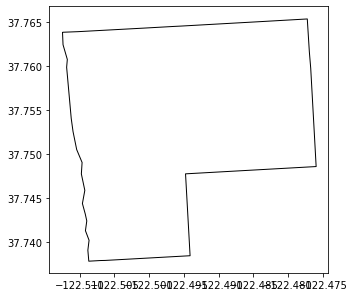

In [15]:
plt.rcParams["figure.figsize"]=5,5
outer_sunset = sf_neighborhoods.loc[sf_neighborhoods.name == "Outer Sunset"]
_ = outer_sunset.plot(color='white', edgecolor='black')

In [16]:
sunset_pts = geo_pd.overlay(all_incidents, outer_sunset, how='intersection')

In [17]:
sunset_pts.shape

(14643, 66)

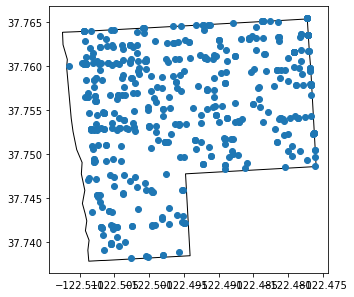

In [18]:
plt.rcParams["figure.figsize"]=5,5
base_plot = outer_sunset.plot(color='white', edgecolor='black')
_ = sunset_pts.sample(500).plot(ax=base_plot)

### Find facilities within 0.5 miles of the district

In [19]:
# create boundary around the district that "buffers" it by an additional 1/2 mile (800 meters)
outer_buffer = outer_sunset.geometry.to_crs(epsg='6838').buffer(800) 

# find the fire stations with the buffered boundary
fire_facilities_boundary = geo_pd.GeoDataFrame(outer_buffer.to_crs(epsg='4326'), geometry=0)
nearby_firestations = geo_pd.overlay(fire_facilities, fire_facilities_boundary, how='intersection')

In [20]:
nearby_firestations.head()

,facility_id,common_name,address,city,zip_code,block_lot,owned_leased,dept_id_for_jurisdiction,jurisdiction,gross_sq_ft,longitude,latitude,supervisor_district,city_tenants,land_id,geometry
0,723,Fire Station #40,2155 18th Ave,San Francisco,94116,2199003,Own,38,Fire Department,7350.0,-122.475269,37.747611,7,NaN,318.0,POINT (-122.47527 37.74761)
1,706,Fire Station #23,1348 45th Ave,San Francisco,94122,1799029,Own,38,Fire Department,12000.0,-122.504710,37.761406,4,NaN,319.0,POINT (-122.50471 37.76141)
2,705,Fire Station #22,1290 16th Ave,San Francisco,94122,1735064,Own,38,Fire Department,5900.0,-122.473687,37.763930,5,NaN,322.0,POINT (-122.47369 37.76393)
3,700,Fire Station #18,1935 32nd Ave,San Francisco,94116,2102006,Own,38,Fire Department,15900.0,-122.490544,37.750986,4,NaN,321.0,POINT (-122.49054 37.75099)


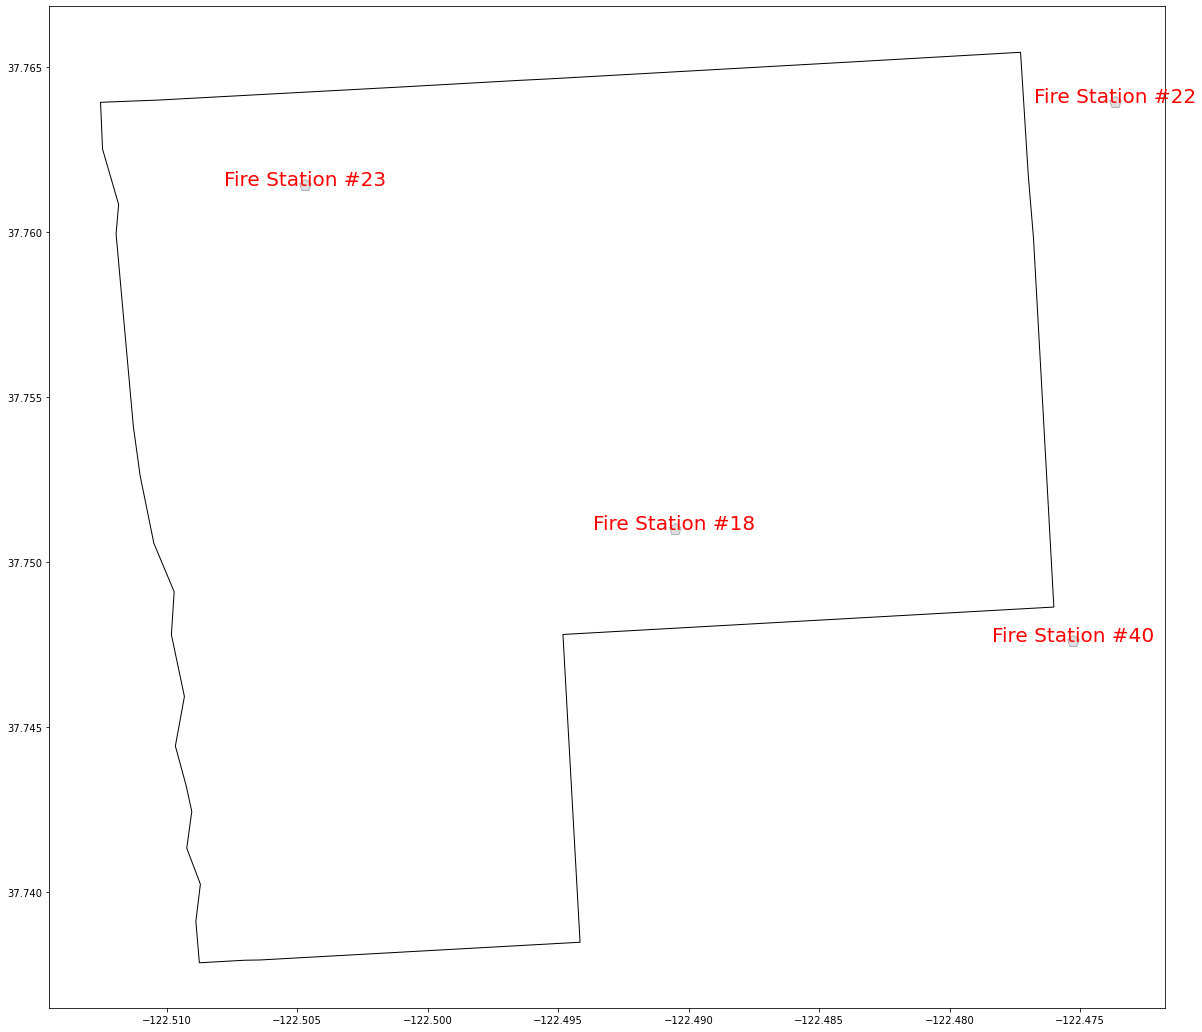

In [21]:
plt.rcParams["figure.figsize"]=20,20
full_plot = outer_sunset.plot(color="white", edgecolor="black")

_ = nearby_firestations.plot(
    ax=full_plot, 
    markersize=150, 
    marker="p", 
    color="gray", 
    edgecolor="black", 
    alpha=0.25)

_ = nearby_firestations.apply(
    lambda x: full_plot.annotate(
        text=str(x.common_name), 
        xy=x.geometry.centroid.coords[0], 
        color='red', 
        ha='center', 
        size="20"), axis=1)

In [22]:
# filter the nearby points down to the fire stations shown above 
filter_cols = nearby_firestations.common_name.to_list()
filter_cols

['Fire Station #40',
 'Fire Station #23',
 'Fire Station #22',
 'Fire Station #18']

In [23]:
unpiv_distances = incident_distances[['ID'] + filter_cols].melt(
    id_vars=['ID'], 
    var_name='common_name', 
    value_name='distance')
unpiv_distances

,ID,common_name,distance
0,80283040,Fire Station #40,0.057163
1,80283030,Fire Station #40,0.080847
2,80283090,Fire Station #40,0.075175
3,80283140,Fire Station #40,0.056193
4,80283190,Fire Station #40,0.028901
...,...,...,...
2264999,210683470,Fire Station #18,0.053222
2265000,210741500,Fire Station #18,0.056871
2265001,210741780,Fire Station #18,0.090890
2265002,210773690,Fire Station #18,0.077228


In [24]:
min_dist_frame = unpiv_distances.groupby(by="ID").distance.min().to_frame()
min_dist_frame

,distance
ID,
30000010,0.058919
30000030,0.068638
30000060,0.083573
30000070,0.078538
30000140,0.002753
...,...
211048080,0.057459
211048480,0.068479
211048540,0.070403


In [25]:
joined_df = unpiv_distances.set_index("ID").join(min_dist_frame, how='inner', rsuffix='_min')
min_dist_frame = joined_df[joined_df.distance == joined_df.distance_min]

In [26]:
min_dist_frame

,common_name,distance,distance_min
ID,,,
30000010,Fire Station #22,0.058919,0.058919
30000030,Fire Station #22,0.068638,0.068638
30000060,Fire Station #22,0.083573,0.083573
30000070,Fire Station #22,0.078538,0.078538
30000140,Fire Station #18,0.002753,0.002753
...,...,...,...
211048080,Fire Station #22,0.057459,0.057459
211048480,Fire Station #22,0.068479,0.068479
211048540,Fire Station #22,0.070403,0.070403


In [27]:
min_dist_frame = min_dist_frame.rename(columns={'common_name':'common_name_min'}).drop("distance", axis=1)
min_dist_frame

,common_name_min,distance_min
ID,,
30000010,Fire Station #22,0.058919
30000030,Fire Station #22,0.068638
30000060,Fire Station #22,0.083573
30000070,Fire Station #22,0.078538
30000140,Fire Station #18,0.002753
...,...,...
211048080,Fire Station #22,0.057459
211048480,Fire Station #22,0.068479
211048540,Fire Station #22,0.070403


In [32]:
dtree_df['response_qtile'] = pd.qcut(dtree_df.response_time.values, 5, labels=False)
dtree_df.response_qtile.value_counts()

0    2970
1    2936
2    2920
4    2913
3    2904
Name: response_qtile, dtype: int64

## Create a grid and compute chi-sqr of high response times

In [236]:
from shapely.geometry import Polygon

# get dimensions of current region
xmin, ymin, xmax, ymax = outer_sunset.geometry.total_bounds
step_size = 6
step_x = (xmax - xmin) / step_size
step_y = (ymax - ymin) / step_size

# create a single column of x and y, to later cross product
x_left = np.arange(xmin, xmax, step_x)
x_df = pd.DataFrame(np.column_stack((x_left,x_left + step_x)), columns=['x_left', 'x_right'])
y_top = np.arange(ymax, ymin, -step_y)
y_df = pd.DataFrame(np.column_stack((y_top, y_top - step_y)), columns=['y_top', 'y_bottom'])

# cross product dummy cols
x_df['dummy'] = 1
y_df['dummy'] = 1

# cross-product to get the grid polygons
grid_polygons = x_df.merge(y_df, on='dummy', how='inner').drop("dummy", axis=1)
grid_polygons

,x_left,x_right,y_top,y_bottom
0,-122.512548,-122.506462,37.765448,37.760852
1,-122.512548,-122.506462,37.760852,37.756257
2,-122.512548,-122.506462,37.756257,37.751661
3,-122.512548,-122.506462,37.751661,37.747066
4,-122.512548,-122.506462,37.747066,37.742470
5,-122.512548,-122.506462,37.742470,37.737875
6,-122.506462,-122.500377,37.765448,37.760852
7,-122.506462,-122.500377,37.760852,37.756257
8,-122.506462,-122.500377,37.756257,37.751661
9,-122.506462,-122.500377,37.751661,37.747066


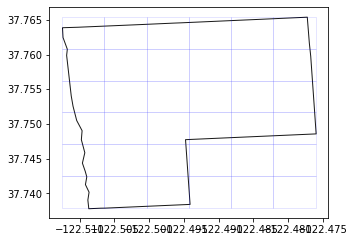

In [237]:
plt.rcParams["figure.figsize"]=5,5
grid_poly = geo_pd.GeoSeries(grid_polygons.apply(lambda d: Polygon([    
    (d.x_left, d.y_top),    
    (d.x_left, d.y_bottom),
    (d.x_right, d.y_bottom),
    (d.x_right, d.y_top)]), axis = 1))

full_plot = outer_sunset.plot(color="white", edgecolor="black")
_ = grid_poly.plot(ax = full_plot, color="white", edgecolor="blue", alpha=0.1)

In [238]:
# trim the zones to the relevant ones
grid_zones = grid_poly.to_frame("zone").reset_index().rename({"index": "zone_idx"}, axis=1)
grid_zones = geo_pd.GeoDataFrame(grid_zones, crs="EPSG:4326", geometry='zone')
grid_zones = geo_pd.sjoin(grid_zones, outer_sunset, how='inner', op='intersects')[['zone_idx', 'zone']]
grid_zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

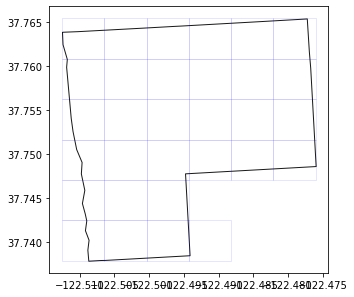

In [239]:
plt.rcParams["figure.figsize"]=5,5
full_plot = outer_sunset.plot(color="white", edgecolor="black")
_ = grid_zones.plot(ax = full_plot, color="white", edgecolor="blue", alpha=0.1)

In [320]:
zone_points = geo_pd.sjoin(sunset_pts, grid_zones, how='left', op='within')
zone_points['response_time'] = pd.to_datetime(dtree_df['Arrival DtTm']) - pd.to_datetime(dtree_df['Alarm DtTm'])
zone_points['response_time'] = zone_points['response_time'].dt.seconds
zone_points['response_qtile'] = pd.qcut(zone_points.response_time, 5, labels=False)
zone_points = zone_points[['ID', 'zone_idx', 'response_time', 'response_qtile']]
zone_stats = zone_points.groupby(by='zone_idx').agg(['median', 'count'])
grid_zone_stats = grid_zones.merge(zone_stats.response_time, on='zone_idx')
grid_zone_stats['inc_count'] = grid_zone_stats['count']
grid_zone_stats['inc_median'] = grid_zone_stats['median']
grid_zone_stats = grid_zone_stats.drop(['count', 'median'], axis=1)
grid_zone_stats

,zone_idx,zone,inc_count,inc_median
0,0,"POLYGON ((-122.51255 37.76545, -122.51255 37.7...",589,279.0
1,1,"POLYGON ((-122.51255 37.76085, -122.51255 37.7...",804,282.0
2,2,"POLYGON ((-122.51255 37.75626, -122.51255 37.7...",395,313.0
3,3,"POLYGON ((-122.51255 37.75166, -122.51255 37.7...",237,333.0
4,4,"POLYGON ((-122.51255 37.74707, -122.51255 37.7...",171,364.0
5,5,"POLYGON ((-122.51255 37.74247, -122.51255 37.7...",182,347.0
6,6,"POLYGON ((-122.50646 37.76545, -122.50646 37.7...",648,239.0
7,7,"POLYGON ((-122.50646 37.76085, -122.50646 37.7...",751,240.0
8,8,"POLYGON ((-122.50646 37.75626, -122.50646 37.7...",445,293.0
9,9,"POLYGON ((-122.50646 37.75166, -122.50646 37.7...",469,328.0


In [333]:
?plt.title

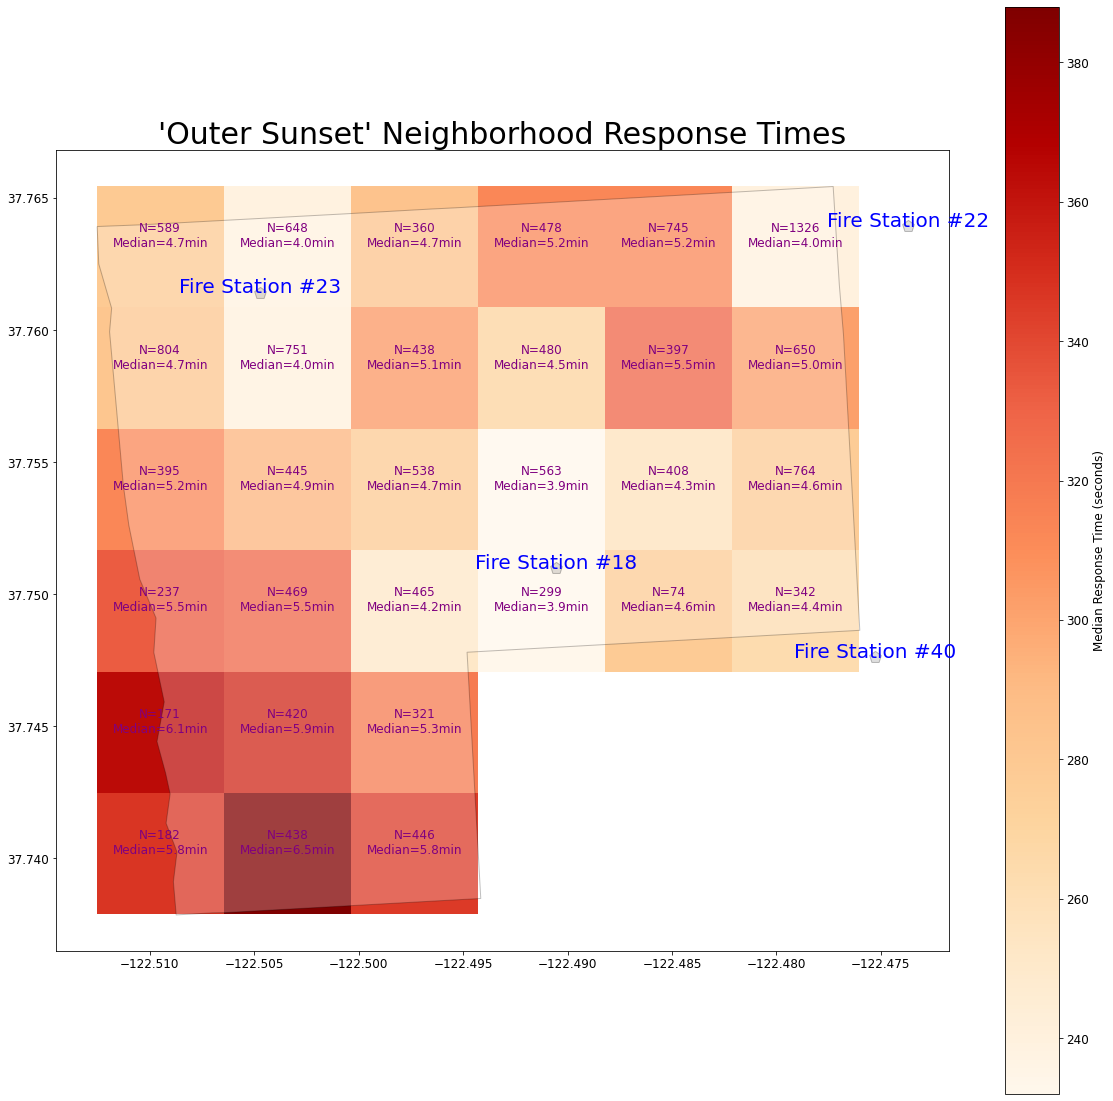

In [337]:
plt.rcParams["figure.figsize"]=20,20
plt.rcParams.update({'font.size':  12})

full_plot = grid_zone_stats.plot(
    column='inc_median', 
    legend=True, 
    cmap='OrRd', 
    legend_kwds={        
        'label': "Median Response Time (seconds)"})

plt.title("'Outer Sunset' Neighborhood Response Times",fontsize=30)

_ = outer_sunset.plot(ax = full_plot, color="white", edgecolor="black", alpha=0.25)

_ = nearby_firestations.plot(
    ax=full_plot, 
    markersize=150, 
    marker="p", 
    color="gray", 
    edgecolor="black", 
    alpha=0.25)

_ = nearby_firestations.apply(
    lambda x: full_plot.annotate(
        text=str(x.common_name), 
        xy=x.geometry.centroid.coords[0], 
        color='blue', 
        ha='center', 
        size="20"), axis=1)

_ = grid_zone_stats.apply(
    lambda x: full_plot.annotate(
        text="N="+str(x.inc_count)+"\nMedian="+str(round(x.inc_median/60, 1))+"min",
        xy=x.zone.centroid.coords[0],
        color='purple',
        ha='center'), axis=1)

In [261]:
?plt.colorbar